## Experiment 1: Phase Space Plot

Name: Shyam Sunder
Roll No.: Ph22c047

Date of Experiment: 10-12 Aug 2022

Date of Submission: 


From Newton's second law, the forces that govern the motion of the pendulum are:

\begin{equation}
\frac{d^2 \theta}{dt^2} = -\omega_0^2 \sin(\theta)-\alpha\frac{d\theta}{dt} + A \cos(\omega t)
\end{equation}

where $\omega_0$ is the natural frequency of the pendulum, the $\alpha$ term arises due to friction and the
$A$ term is the driving force with the driving frequency $\omega$.

Using Natural units such as $\omega = 1$ $r$ is the pendulum's driving and natural frequency ratio. $\tau$ is dimensionless time.

$$\frac{d^2 \theta }{d\tau^2} = -sin(\theta) - \alpha \frac{d\theta}{dt} + a \sin(r \tau)$$

Defining new variables as

$$\theta = y_1$$

$$\frac{d \theta
1}{d\tau} = y_2$$

This will mean that
$$\frac{d y_1}{d \tau} = y_2$$


$$\frac{d y_2}{d \tau} = -\sin(\theta)-\alpha y_1+a\sin(r \tau)$$

### Simple Pendulum

Replace $sin(y1 (t)) \approx y1 (t)$ and choose $A = 0$ $\alpha = 0 $: Ideal pendulum for different
initial values of $y_1$ (0) and $y_2 (0)$. Make a plot of the phase space i.e. a plot of $y2 (t)$ as a function of $y1 (t)$. Study the motion from $t = 0$ to $t = 4T$ .
What do you get? 

In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

plt.style.use('seaborn-whitegrid')

In [18]:
def solver(x, T=5):
    t= 0
    tf = 4*T*math.pi
    h = 0.01
    N = int((tf-t)/h)

#     alpha = alpha   #damping parameter
#     A = A #driving parameter
#     r = r #ratio of original and driving frequency

    #lists to store values
    xs = np.zeros((N, 2))
    ts = np.zeros((N, 1))

    #the derrivative function
    def f(t,X):
        y1, y2 = X

        a = -y1

        return np.array((y2, a))

    #setting up initial conditions
    x = np.array(x, dtype=float)
    xs[0] = x

    for step in range(0, N):

        #implimanting RK4 Agoritham
        k1 = h*f(t, x)
        k2 = h*f(t+h/2, x+k1/2)
        k3 = h*f(t+h/2, x+k2/2)
        k4 = h*f(t+h, x+k3)

        x += (k1+2*k2+2*k3+k4)/6
        t += h

        xs[step] = x
        ts[step] = t
        
    return xs, ts


In [19]:
xs, ts = solver((1., 0.))

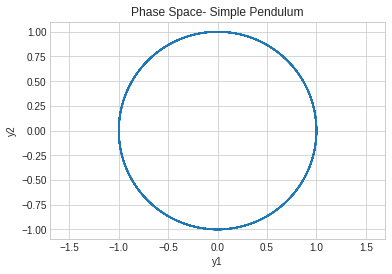

In [20]:
plt.plot(*zip(*xs))
plt.axis('equal');
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Phase Space- Simple Pendulum');
plt.savefig('graph1.png')

Because the motion is periodic, we get a circle for the phase space plot. 

Now we want to see that how does this plot changes for slight change in the initial conditions. For that we will change the initial value of $y_0$ slighty. 

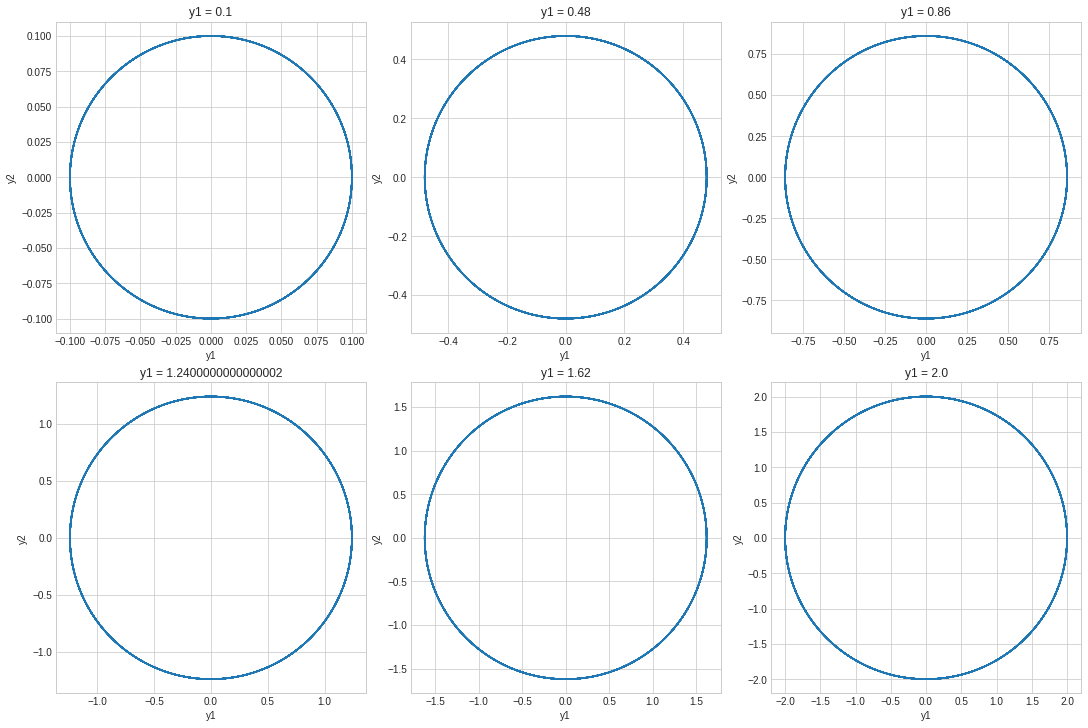

In [5]:
#for different initial conditions

y10s = np.linspace(0.1, 2, 6)
fig, axes = plt.subplots(2, 3, constrained_layout = True, figsize=(15,10))


for i in range(2):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver((0, y10s[k]))
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'y1 = {y10s[k]}')
        axes[i][j].set_xlabel('y1')
        axes[i][j].set_ylabel('y2')

As we can see in this image that the phase space doesn't chaneg much when we chaneg the values they looks just the same. This indicates that our system is not much sensetive to the initial conditions.  


If we don't take the small angle approximation, the graphs will the slightly different. For small angles, it will be the same but if we take large angles into account while providing initial conditions, the difference can be seen. 


In [22]:
def solver(x, alpha, A, r, T=5):
    t= 0
    tf = 4*T*math.pi
    h = 0.01
    N = int((tf-t)/h)

    alpha = alpha   #damping parameter
#     A = A #driving parameter
#     r = r #ratio of original and driving frequency

    #lists to store values
    xs = np.zeros((N, 2))
    ts = np.zeros((N, 1))

    #the derrivative function
    def f(t,X):
        y1, y2 = X

        a = -math.sin(y1)-alpha*y2+A*math.cos(r*t)

        return np.array((y2, a))

    #setting up initial conditions
    x = np.array(x, dtype=float)
    xs[0] = x

    for step in range(0, N):

        #implimanting RK4 Agoritham
        k1 = h*f(t, x)
        k2 = h*f(t+h/2, x+k1/2)
        k3 = h*f(t+h/2, x+k2/2)
        k4 = h*f(t+h, x+k3)

        x += (k1+2*k2+2*k3+k4)/6
        t += h

        xs[step] = x
        ts[step] = t
        
    return xs, ts


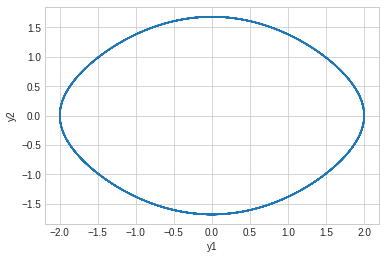

In [23]:
xs, ts = solver((2., 0.), 0, 0, 0)
plt.plot(*zip(*xs))
plt.xlabel('y1')
plt.ylabel('y2');

This is phase space plot for non-harmonic case, i.e if we don't replace $\sin(\theta)$ with $\theta$. This is slightly bend from the previous case, the motion is still periodic but not simple harmonic anymore. We scatch $\theta$ vs $t$

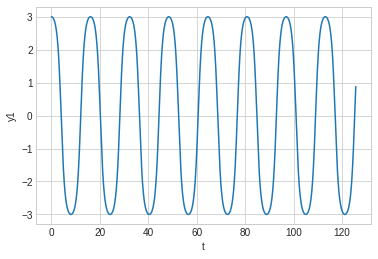

In [24]:
xs, ts = solver((3., 0.), 0, 0, 0, T=10)
y1ss = [i[0] for i in xs]
plt.plot(ts, y1ss)
plt.xlabel('t')
plt.ylabel('y1');

THis clearly shows the perodic but it is not simply sin function so this is not simple harmonic motion. 

Now when we need to see the damping behavior in the oscillator, we can see that when we take $\alpha = 0.1$ the phase space will be a spiral going inward to the origin. Because of damping, the system will lose energy, and at last it will rest at the origin. 

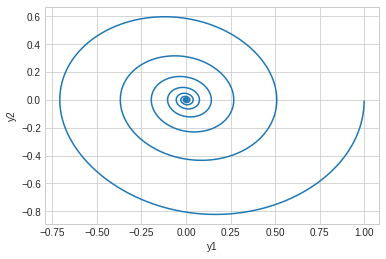

In [25]:
xs, ts = solver((1., 0.), 0.2, 0, 0)
plt.plot(*zip(*xs))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 1$, $y_1=0$ $\alpha = 0.2$

Text(0, 0.5, 'y1')

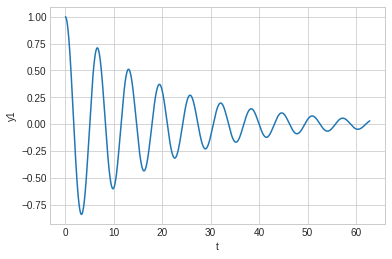

In [26]:
xs, ts = solver((1., 0.), 0.1, 0, 0)
y1ss = [i[0] for i in xs]
plt.plot(ts, y1ss)
plt.xlabel('t')
plt.ylabel('y1')

$y_0 = 1$, $y_1=0$ $\alpha = 0.1$

It can be seen clearly in this graph that amplitude is decreasing with time!

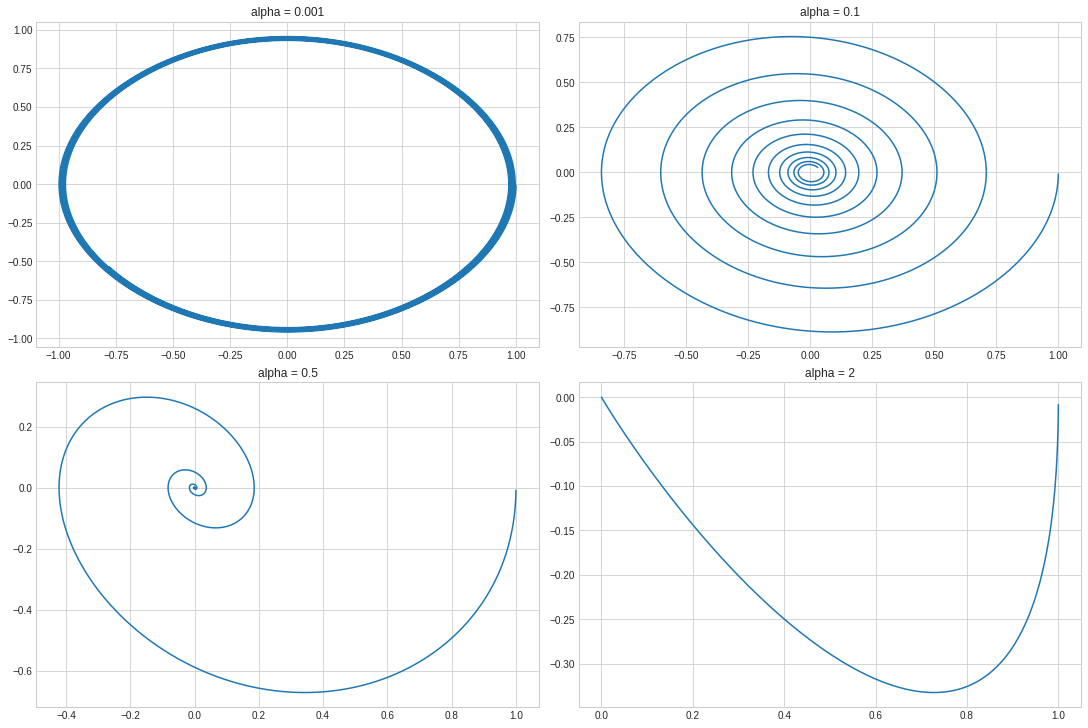

In [27]:
#A = 0, and changing alpha
alpha = [0.001,0.1, 0.5, 2]

fig, axes = plt.subplots(2, 2, constrained_layout = True, figsize=(15, 10))

for i in range(2):
    for j in range(2):
        k = 2*i+j
        xs, ts = solver((1., 0.), alpha[k], 0, 0)
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'alpha = {alpha[k]}')

$y_0 = 1$, $y_1 = 0$, $\alpha$ $\epsilon$ $\{0.001,0.1, 0.5, 2\}$

For different values  of alpha, by increasing the  damping parameter, the oscillations decay faster in the pendulum, and the spiral will tend to origin more quickly.

## Adding a driving force

In this case we are also adding a driving force, The drving force will take over the damping force and at last the system will oscillate with the drving frequency. 

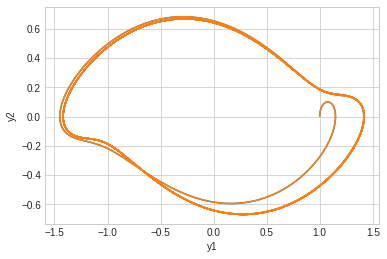

In [28]:
xs, ts = solver((1, 0), 0.5, 1, 0.33, T =10)
plt.plot(*zip(*xs))
plt.plot(*zip(*xs))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 1$, $y_1=0$ $\alpha = 0.5$ $A = 1$, $r = 0.66$

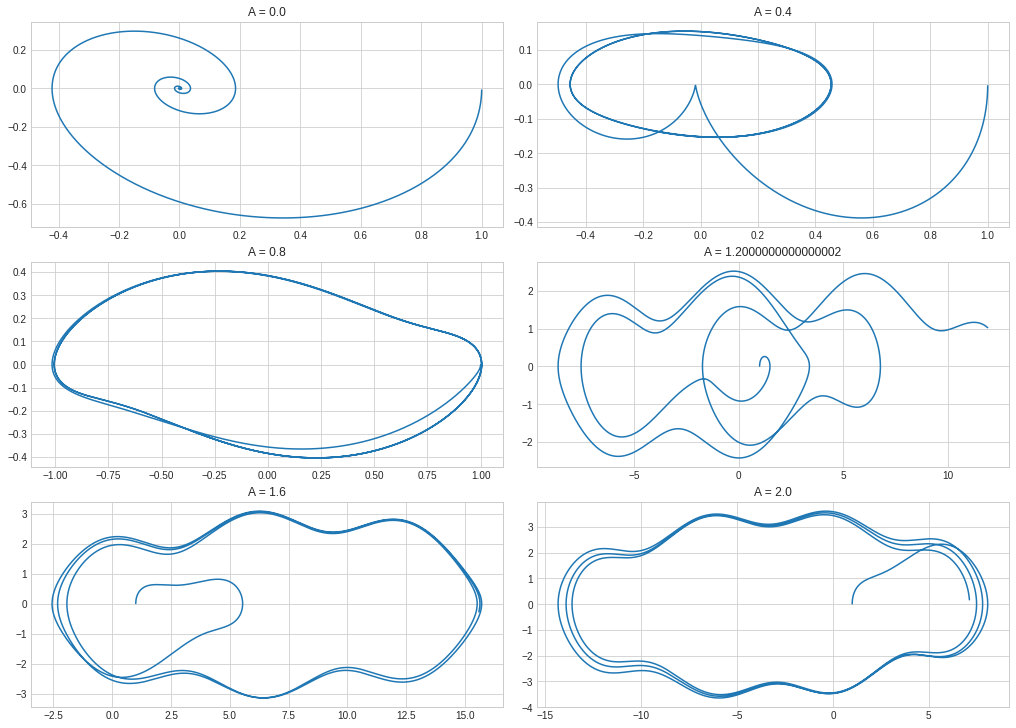

In [29]:
Aas = np.linspace(0, 2, 6)

fig, axes = plt.subplots(3, 2, constrained_layout = True, figsize=(14,10))

for i in range(3):
    for j in range(2):
        k = 2*i+j
        xs, ts = solver((1., 0.), alpha=0.5, A=Aas[k], r =1/3)
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'A = {Aas[k]}')

$y_0 = 1$, $y_1=0$ $\alpha = 0.5$ $r = 0.66$

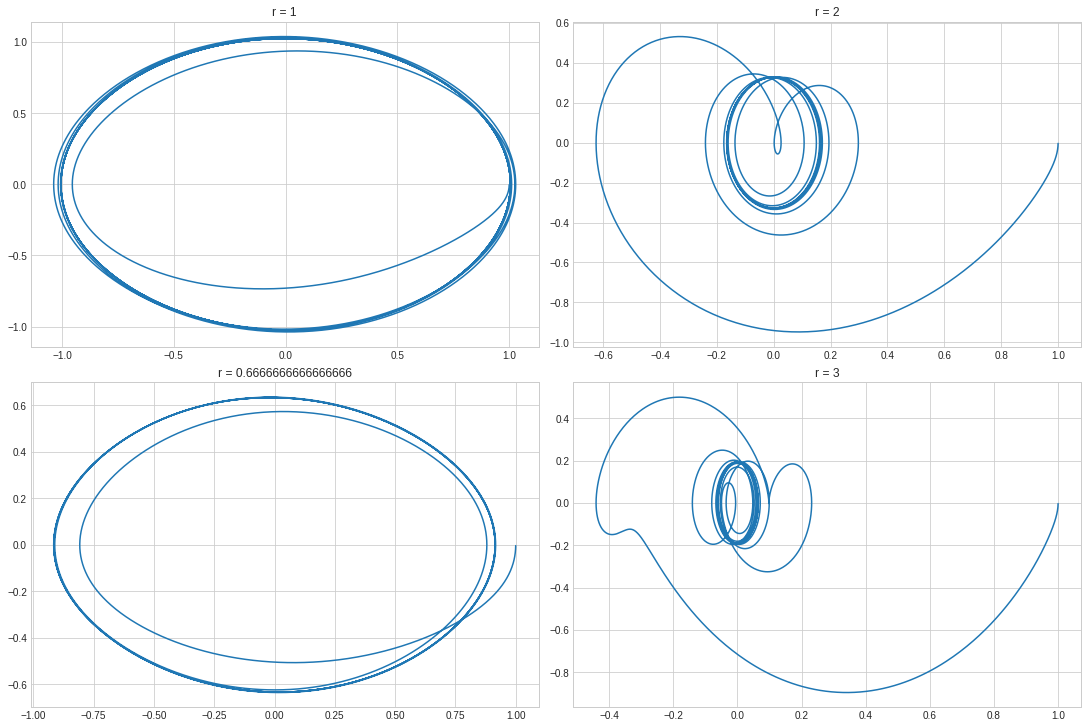

In [14]:
#A = 0.52 and changing r
r = [1, 2, 2/3, 3]

fig, axes = plt.subplots(2, 2, constrained_layout = True, figsize=(15,10))

for i in range(2):
    for j in range(2):
        k = 2*i+j
        xs, ts = solver((1., 0.), alpha=0.5, A=0.52, r =r[k])
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'r = {r[k]}')

$y_0 = 1$, $y_1=0$ $\alpha = 0.5$ $A = 0.2$

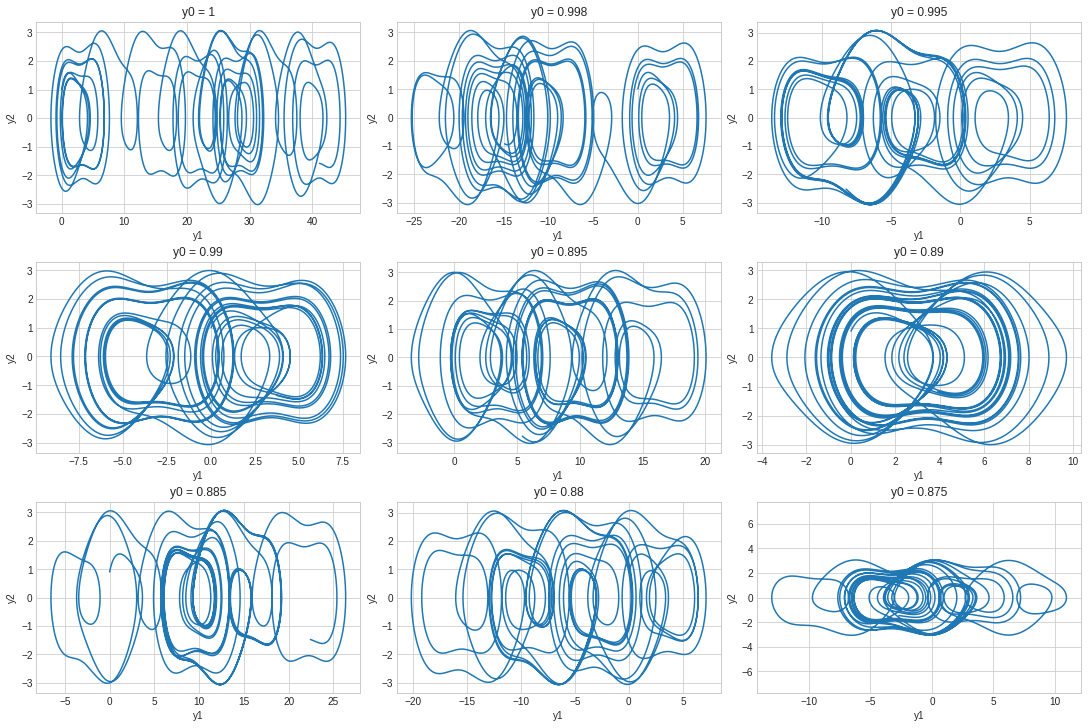

In [31]:
#A = 2, alpha = 0.5, w = 2/3 changing y
yss = [1, 0.998, 0.995, 0.990, 0.895, 0.890, 0.885, 0.880, 0.875]

fig, axes = plt.subplots(3, 3, constrained_layout = True, figsize=(15,10))
plt.axis('equal')
fig.size_inches=(6,3)

for i in range(3):
    for j in range(3):
        k = 3*i+j
#         print(k)
        xs, ts = solver((0., yss[k]), alpha=0.5, A=2, r =2/3, T=20)
        axes[i][j].plot(*zip(*xs))
        axes[i][j].set_title(f'y0 = {yss[k]}')
        axes[i][j].set_xlabel('y1')
        axes[i][j].set_ylabel('y2')

$y_0 = 1$, $\alpha = 0.5$ $r = 0.66$ $A = 2$

In this case, it is important to observe that we are changing the intial condition $y_0$ at third decimal place, which is a very small change but as we can see that this small change in initial condition is producing a significant change in the final phase space plot. This is direct indication that our system in too sensetive to the intial condition. 

## Poincre Sections

Let's look at the the intersection of the trajecotry with the surface $y1=0$ for simple undamped pendulum, this will provide us the imformation about behaviour of our system about the mean position.

In [16]:
xs_p_list = []
ts_p_list = []
tol = 1e-2
xs, ts = solver((1., 0.), alpha=0, A=0, r =0)

for i in range(len(ts)):
    r = 2/3
    x, t = xs[i], ts[i]
#     print(ts[i])
    if abs(x[0])<tol:
        xs_p_list.append(x)
        ts_p_list.append(t)

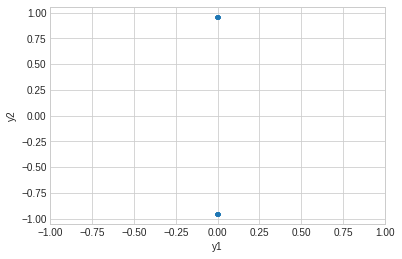

In [17]:
plt.plot(*zip(*xs_p_list), '.')
plt.xlim((-1, 1))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 1$, $y_1 = 0$, $\alpha =  0$ 

There are only two points in this graph, that passes through this is because the  pendulum passes through mean position twice, with same but opposite velocities. So it cuts the section twice every cycle. 

This makes sense because we know if there are points in pioncr$e\:$ section than the motion is perodic. 

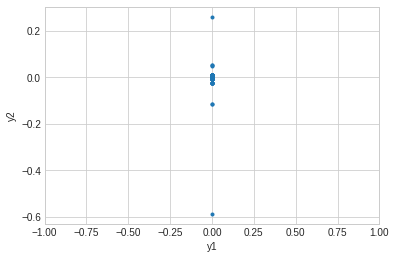

In [18]:
xs_p_list = []
ts_p_list = []
tol = 1e-3
xs, ts = solver((1., 0.), alpha=0.5,  A=0, r =0)

for i in range(len(ts)):
    r = 2/3
    x, t = xs[i], ts[i]
#     print(ts[i])
    if abs(x[0])<tol:
        xs_p_list.append(x)
        ts_p_list.append(t)
        
plt.plot(*zip(*xs_p_list), '.')
plt.xlim((-1, 1))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 1$,$y_0 = 0$,$\alpha = 0.5$

In [19]:
xs_p_list = []
ts_p_list = []
tol = 1e-2
xs, ts = solver((1., 0.), alpha=0.52, A=2, r =2/3)

for i in range(len(ts)):
    r = 2/3
    x, t = xs[i], ts[i]
#     print(ts[i])
    if abs(x[0])<tol:
        xs_p_list.append(x)
        ts_p_list.append(t)

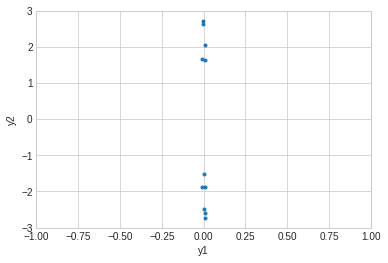

In [20]:
plt.plot(*zip(*xs_p_list), '.')
plt.xlim((-1, 1))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 1$,$y_1 = 0$,$\alpha = 0.52$, $A = 2$, $r = 2/3$

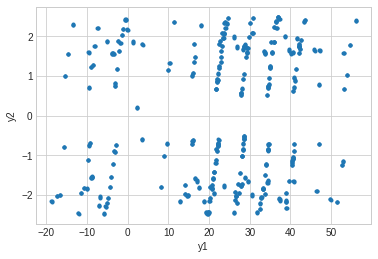

In [30]:
xs_p_list = []
ts_p_list = []
tol = 1e-2
xs, ts = solver((0.879, 0.), alpha=0.52, A=2, r =2/3, T=100)

for i in range(len(ts)):
    r = 2/3
    x, t = xs[i], ts[i]
#     print(ts[i])
    if abs(math.cos(r*t))<tol:
        xs_p_list.append(x)
        ts_p_list.append(t)

plt.plot(*zip(*xs_p_list), '.')
# plt.xlim((-1, 1))
plt.xlabel('y1')
plt.ylabel('y2');

$y_0 = 0.879$,$y_1 = 0$,$\alpha = 0.52$, $A = 2$, $r = 2/3$

This purely indicates that the motion is not peroidic at all. It has random dots that spacifies that the motion is perodic. 